In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# Loding or Reading the file

df = pd.read_csv("data.csv", parse_dates=["day"])
df.set_index('day',inplace= True)
df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,NaN,9.0,Sunny
2017-01-05,28.0,NaN,Snow
2017-01-06,NaN,7.0,NaN
2017-01-07,32.0,NaN,Rain
2017-01-08,NaN,NaN,Sunny
2017-01-09,NaN,NaN,NaN
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


In [13]:
# Filling null with 0
new_df = df.fillna({'temperature':0,
                   'windspeed':0,
                   'event':'no event'})
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,0.0,9.0,Sunny
2017-01-05,28.0,0.0,Snow
2017-01-06,0.0,7.0,no event
2017-01-07,32.0,0.0,Rain
2017-01-08,0.0,0.0,Sunny
2017-01-09,0.0,0.0,no event
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


In [14]:
#Filling Nulls with forward fill
new_df = df.fillna(method ='ffill')
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,32.0,9.0,Sunny
2017-01-05,28.0,9.0,Snow
2017-01-06,28.0,7.0,Snow
2017-01-07,32.0,7.0,Rain
2017-01-08,32.0,7.0,Sunny
2017-01-09,32.0,7.0,Sunny
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


In [16]:
new_df = df.interpolate(method ="time")
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.000000,6.00,Rain
2017-01-04,29.000000,9.00,Sunny
2017-01-05,28.000000,8.00,Snow
2017-01-06,30.000000,7.00,NaN
2017-01-07,32.000000,7.25,Rain
2017-01-08,32.666667,7.50,Sunny
2017-01-09,33.333333,7.75,NaN
2017-01-10,34.000000,8.00,Cloudy
2017-01-11,40.000000,12.00,Sunny


In [18]:
# if you want to drop na value
new_df = df.dropna(how='all')
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,NaN,9.0,Sunny
2017-01-05,28.0,NaN,Snow
2017-01-06,NaN,7.0,NaN
2017-01-07,32.0,NaN,Rain
2017-01-08,NaN,NaN,Sunny
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


In [21]:
# Merging 
df1 = pd.DataFrame({"HPI":[80,90,70,60],"Int_rate":[2,1,2,3],"IND_GDP":[50,45,65,75]},
                   index =[2011,2012,2013,2014])
df2 = pd.DataFrame({"HPI":[80,90,70,60],"Int_rate":[2,1,2,3],"IND_GDP":[50,45,65,75]},
                  index =[2015,2016,2017,2018])
merged_data = pd.merge(df1,df2, on ='HPI')
merged_data

,HPI,Int_rate_x,IND_GDP_x,Int_rate_y,IND_GDP_y
0,80,2,50,2,50
1,90,1,45,1,45
2,70,2,65,2,65
3,60,3,75,3,75


In [22]:
p = pd.DataFrame({"Int_rate":[2,1,2,3],"IND_GDP":[50,45,65,75]},
                   index =[2011,2012,2013,2014])
q = pd.DataFrame({"Low_Tier_HPI":[50,45,67,56],"Unemployment":[1,3,5,6]},
                  index =[2011,2013,2014,2014])
joined = p.join(q)
joined

,Int_rate,IND_GDP,Low_Tier_HPI,Unemployment
2011,2,50,50.0,1.0
2012,1,45,NaN,NaN
2013,2,65,45.0,3.0
2014,3,75,67.0,5.0
2014,3,75,56.0,6.0


In [23]:
 # Changing the index and Column headers
df = pd.DataFrame({"Day":[1,2,3,4], "Visitors":[200,100,340,450],
                   "Bounce_Rate":[20,45,60,10]})
df.set_index("Day", inplace=True)
df


,Visitors,Bounce_Rate
Day,,
1,200,20
2,100,45
3,340,60
4,450,10


In [25]:
df = pd.DataFrame({"Day":[1,2,3,4], "Visitors":[200,100,340,450],
                   "Bounce_Rate":[20,45,60,10]})
df =df.rename(columns = {"Visitors": "Users"})
df

,Day,Users,Bounce_Rate
0,1,200,20
1,2,100,45
2,3,340,60
3,4,450,10


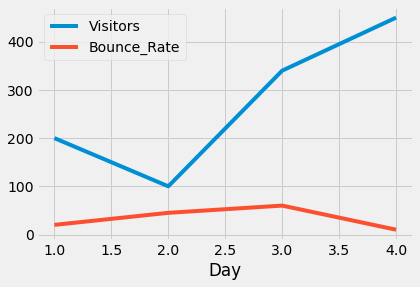

In [26]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use("fivethirtyeight")


df = pd.DataFrame({"Day":[1,2,3,4], "Visitors":[200,100,340,450],
                   "Bounce_Rate":[20,45,60,10]})
df.set_index("Day", inplace=True)
df.plot()
plt.show()